<a href="https://colab.research.google.com/github/Eurecker/Eurecker/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the required libraries
import tweepy 
from textblob import TextBlob
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [ ]:
# Twitter API Info 
APIkey= "02LHdIEpLqkPwBitX0bCgapjZ"
APISecretKey= "BjwEXmlljAr2dxT2fIo0ASK0U2DdPgeFvEzKpaPoWBuJ4IeHk3"
accessToken= "834452775341871106-lB7yeKdbP2ndVW4UHz7Ow8GWCULjpO5"
accessTokenSecret= "YJMAZZQOrL8QKLj3tXQwciqtKMvXiNgc2uPm0I2qbcPcm"


In [ ]:
# Authentication Object Creation
authenticate = tweepy.OAuthHandler(APIkey,APISecretKey)
authenticate.set_access_token(accessToken,accessTokenSecret)
api = tweepy.API(authenticate)

In [ ]:
posts= api.user_timeline(screen_name='Bitcoin',count=100,lang="en",tweet_mode='extended')
i=1
for tweet in posts[:10]:  # just want to see the top 10 from 100
    print(str(i) + ') ' + tweet.full_text + '\n')
    i= i+1

1) "#Bitcoin is a technical solution to give 8,000,000,000 people property rights... when their relatives remit money back to El Salvador they lose 10% through money transfer agents" @MicroStrategy CEO @Michael_Saylor https://t.co/I72nkuXQhE

2) “Digital assets are quickly becoming integrated into the existing framework of financial services, and it is critical we have the tools in place to provide our clients with solutions” @statestreet CEO Ron O’Hanley https://t.co/5qQ7KxcYgD https://t.co/FrMQRroI21

3) RT @BitcoinMagazine: Wikipedia now lists #Bitcoin as El Salvador's currency. 🇸🇻 https://t.co/dBama9nwcE

4) The 100-1,000 #Bitcoin wallets are stronger than ever! https://t.co/dRHXMjD2s8

5) $37,500.

6) 🇸🇻 https://t.co/1MXcNFGbLB

7) RT @nayibbukele: I’ve just instructed the president of @LaGeoSV (our state-owned geothermal electric company), to put up a plan to offer fa…

8) A sovereign nation 🇸🇻 making #Bitcoin legal tender. @nayibbukele https://t.co/iSfgNRSVT8

9) RT @udiWertheim

In [ ]:
# Creating a dataframe using pandas to sort the data 
df= pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])
df

,Tweets
0,"""#Bitcoin is a technical solution to give 8,00..."
1,“Digital assets are quickly becoming integrate...
2,RT @BitcoinMagazine: Wikipedia now lists #Bitc...
3,"The 100-1,000 #Bitcoin wallets are stronger th..."
4,"$37,500."
...,...
95,RT @dan_pantera: This is getting ridiculous. ...
96,An interesting increase in the fiat money expe...
97,Most likely #Bitcoin is not going away. The fu...
98,#Bitcoin is in the top-10 of the world's M1 Mo...


In [ ]:
# cleanText cleans the tweets removing @,hyperlinks and retweets
def cleanText(text):
  text = re.sub('@[A-Za-z0-9]','',text)
  text = re.sub('#','',text)
  text = re.sub('RT[\s]+','',text)
  text= re.sub('https?:\/\/\S+','',text)
  return text 

In [ ]:
df['Tweets']= df['Tweets'].apply(cleanText)
df

In [ ]:
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
df['Subjectivity'] = df['Tweets'].apply(get_subjectivity)
df['Polarity'] = df['Tweets'].apply(get_polarity)
df

,Tweets,Subjectivity,Polarity
0,"""#Bitcoin is a technical solution to give 8,00...",0.05000,0.000000
1,“Digital assets are quickly becoming integrate...,0.41250,0.112500
2,RT @BitcoinMagazine: Wikipedia now lists #Bitc...,0.00000,0.000000
3,"The 100-1,000 #Bitcoin wallets are stronger th...",0.00000,0.000000
4,"$37,500.",0.00000,0.000000
...,...,...,...
95,RT @dan_pantera: This is getting ridiculous. ...,1.00000,-0.333333
96,An interesting increase in the fiat money expe...,0.50000,0.500000
97,Most likely #Bitcoin is not going away. The fu...,0.55625,0.175000
98,#Bitcoin is in the top-10 of the world's M1 Mo...,0.00000,0.000000


In [ ]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis']= df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,"""#Bitcoin is a technical solution to give 8,00...",0.05000,0.000000,Neutral
1,“Digital assets are quickly becoming integrate...,0.41250,0.112500,Positive
2,RT @BitcoinMagazine: Wikipedia now lists #Bitc...,0.00000,0.000000,Neutral
3,"The 100-1,000 #Bitcoin wallets are stronger th...",0.00000,0.000000,Neutral
4,"$37,500.",0.00000,0.000000,Neutral
...,...,...,...,...
95,RT @dan_pantera: This is getting ridiculous. ...,1.00000,-0.333333,Negative
96,An interesting increase in the fiat money expe...,0.50000,0.500000,Positive
97,Most likely #Bitcoin is not going away. The fu...,0.55625,0.175000,Positive
98,#Bitcoin is in the top-10 of the world's M1 Mo...,0.00000,0.000000,Neutral


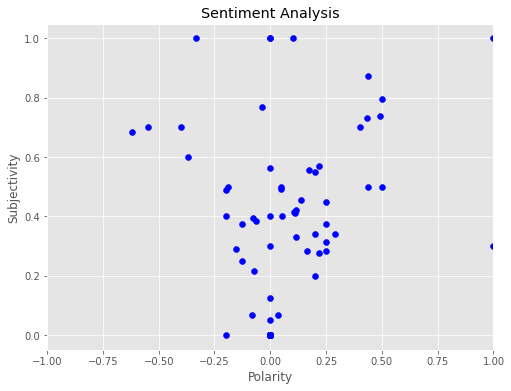

In [ ]:
# plotting scatter plot
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
    
plt.title("Sentiment Analysis")
plt.xlim(-1,1)
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

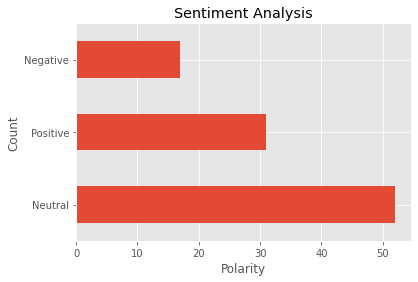

In [ ]:
df['Analysis'].value_counts().plot(kind='barh')
plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()